<a href="https://colab.research.google.com/github/Success-Vera/test-live-coding/blob/master/Ifeoma_Veronica_Nwabufo_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 0: Import the dataset Dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
path= '/content/drive/MyDrive/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [ ]:
##### WRITE YOUR CODE HERE #####
data.info() #also data.dtypes
#### END CODE ####

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Question 3: Describe your dataset

In [ ]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [ ]:
##### WRITE YOUR CODE HERE #####
def standard_scale(x):
  data_scaled=(x-np.mean(x,axis=0))/np.std(x,axis=0)
  return data_scaled
#### END CODE ####

Question 5: Scale your features, except the target. 

In [ ]:
data.shape

(768, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.iloc[:,:-1] = standard_scale(data)

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [ ]:
data_scaled.describe() #check the description of the data after scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.977942e-17,-4.192248e-18,-7.083454e-18,3.050222e-17,1.850372e-17,2.965690e-15,1.929518e-15,2.198762e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.141108e+00,-3.781190e+00,-3.570271e+00,-1.287373e+00,-6.924393e-01,-4.057829e+00,-1.188778e+00,-1.040871e+00
25%,-8.443348e-01,-6.847901e-01,-3.670975e-01,-1.287373e+00,-6.924393e-01,-5.951906e-01,-6.885198e-01,-7.857741e-01
50%,-2.507887e-01,-1.218083e-01,1.495433e-01,1.544326e-01,-4.277835e-01,9.413653e-04,-2.999328e-01,-3.606124e-01
75%,6.395305e-01,6.053764e-01,5.628560e-01,7.186174e-01,4.117396e-01,5.843897e-01,4.659233e-01,6.597757e-01
max,3.904034e+00,2.442886e+00,2.732747e+00,4.918660e+00,6.648507e+00,4.452906e+00,5.879733e+00,4.061069e+00


We see that the mean is tending towards 0 and the standard deviation is tending towards 1.

Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [ ]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [ ]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [ ]:
class logistic_regression:
  def __init__(self,x_test,y_test,num_iters= 100, threshold= 0.5, tolerance= 1e-10, learning_rate= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters=num_iters
    self.threshold=threshold
    self.tolerance=tolerance
    self.learning_rate = learning_rate
    self.theta=None
    self.cost_history=[]
    self.cost_history_test=[]
    self.x_test=x_test
    self.y_test=y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new= np.concatenate((np.ones((len(x),1)),x),axis=1)
    #print(x_new)
    return x_new
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    #print(x.shape,theta.shape)
    z= x @ theta #we don't add a transpose on X because X has dimension (d,n) while theta has dimesnsion (d,1)
    sigmoid=1/(1+np.exp(-z))
    return sigmoid
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    y_pred = self.sigmoid(x,self.theta)
    cost = -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

    return cost/n #we are scaling the cost
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x,self.theta) # using sigmoid function 
      print('pred: ',y_pred)
      # Gradient of cross-entropy
      grad= x.T@(y-y_pred)
      grad= grad.reshape(-1,1) # Reshape, if it is needed
      print('Grad: ',grad)
      # update rules
      self.theta=self.theta-(self.learning_rate*grad/len(x))
      # Compute the training loss
      self.cost_history.append((self.cross_entropy(x,y)))
      self.cost_history_test.append((self.cross_entropy(self.add_ones(x_test),y_test)))


      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    result= [0 if proba < 0.5 else 1 for proba in proba]  # Convert proba to 0 or 1. hint: list comprehension
    return  result
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x,self.theta) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.plot(self.cost_history,label='Train Loss')
    plt.plot(self.cost_history_test,label="Test Loss")
    plt.show()
    #### END CODE ####

In [ ]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test=x_test,y_test=y_test,num_iters=10)

In [ ]:
%%time
model.fit(x_train, y_train)

pred:  [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]

In [ ]:
pred= model.predict(x_test)

[[ 1.         -0.54791859 -0.84172205 ... -0.76057349  0.26916414
  -1.04154944]
 [ 1.         -0.54791859 -0.43485916 ...  0.20401277 -0.20499449
  -0.87137393]
 [ 1.         -0.84488505 -0.40356202 ...  0.44515934 -0.17177318
  -0.78628618]
 ...
 [ 1.          0.04601433  0.12848945 ... -0.39250768  2.02989333
   1.00055664]
 [ 1.         -0.25095213 -0.15318486 ... -0.72249772 -1.10196973
  -0.78628618]
 [ 1.          0.04601433 -0.34096773 ... -0.01174995 -0.00264654
  -0.36084741]]
(154, 9) (9, 1)


In [ ]:
pred

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1]

In [ ]:
# Predict Proba
print(model.predict_proba(x_test))

[[ 1.         -0.54791859 -0.84172205 ... -0.76057349  0.26916414
  -1.04154944]
 [ 1.         -0.54791859 -0.43485916 ...  0.20401277 -0.20499449
  -0.87137393]
 [ 1.         -0.84488505 -0.40356202 ...  0.44515934 -0.17177318
  -0.78628618]
 ...
 [ 1.          0.04601433  0.12848945 ... -0.39250768  2.02989333
   1.00055664]
 [ 1.         -0.25095213 -0.15318486 ... -0.72249772 -1.10196973
  -0.78628618]
 [ 1.          0.04601433 -0.34096773 ... -0.01174995 -0.00264654
  -0.36084741]]
(154, 9) (9, 1)
[[0.51495823]
 [0.509252  ]
 [0.50773557]
 [0.51706906]
 [0.49393789]
 [0.50505904]
 [0.50640312]
 [0.50209309]
 [0.51997559]
 [0.50981367]
 [0.5194007 ]
 [0.51458561]
 [0.48498175]
 [0.52339762]
 [0.49351309]
 [0.51566922]
 [0.49837386]
 [0.50210744]
 [0.50086529]
 [0.5143836 ]
 [0.50651091]
 [0.50171956]
 [0.49747372]
 [0.51131968]
 [0.5024092 ]
 [0.48874309]
 [0.50886918]
 [0.50543624]
 [0.49734129]
 [0.5012732 ]
 [0.52421584]
 [0.48001479]
 [0.51425973]
 [0.5033014 ]
 [0.51242937]
 [

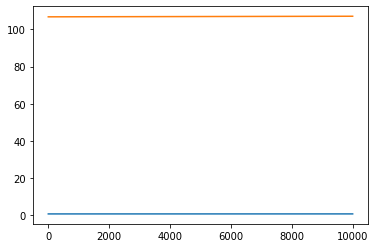

In [ ]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [ ]:
! git clone https://github.com/{username}/{my_repository}.git

In [ ]:
! git remote -v

Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?